In [3]:
import pandas as pd
import numpy as np
from sklearn import *

In [4]:
df = pd.read_csv("/data/creditcard-fraud.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
df.Class.value_counts()/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [9]:
label = "Class"
X = df.loc[:, "V1":"V28"]
y = preprocessing.LabelEncoder().fit_transform(df[label])

X_dummy = pd.get_dummies(X, drop_first=True) # OneHot Encoding



#X: features, y: label
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy,
                                         y, test_size = 0.3, random_state = 1546)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [10]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[85271,    17],
       [   58,    97]])

In [13]:
from mlxtend.plotting import plot_confusion_matrix
import numpy as np

In [11]:
metrics.accuracy_score(y_test, y_test_pred)

0.9991222218320986

In [21]:
y_train_prob = pipe.predict_proba(X_train)[:, 1]
y_test_prob = pipe.predict_proba(X_test)[:, 1]

In [20]:
y_test_prob[:, 1]

array([7.53381695e-01, 3.07186305e-01, 3.67042094e-01, 4.11219762e-01,
       6.59606079e-01, 1.91106168e-01, 4.05360782e-01, 2.27557293e-01,
       6.36441497e-01, 7.59878133e-01, 4.47644615e-01, 1.45550444e-01,
       7.18390593e-01, 1.66916718e-01, 7.75532457e-03, 4.08757306e-01,
       1.32182503e-01, 9.77756801e-01, 1.94717312e-01, 2.49977699e-02,
       8.85621344e-02, 2.87590324e-01, 7.49765233e-03, 1.32290183e-01,
       2.78362678e-01, 8.91314115e-01, 5.07309786e-02, 3.76965283e-01,
       1.54899833e-01, 3.72780052e-01, 7.54565364e-01, 1.61531324e-01,
       3.15762663e-01, 3.89274402e-02, 3.15029902e-01, 4.56995558e-01,
       1.75190455e-01, 4.02210776e-01, 9.47031620e-01, 9.50887100e-01,
       9.80420370e-02, 2.50865920e-01, 7.95326865e-01, 1.89540060e-01,
       5.63452461e-01, 6.64697941e-01, 5.25013267e-01, 1.19390367e-01,
       3.09770402e-01, 5.87017348e-01, 8.42556149e-01, 6.38732171e-01,
       7.66962936e-01, 1.19369205e-01, 4.09872698e-01, 4.87363587e-02,
      

In [22]:
y_test_pred = np.where(y_test_prob>0.5, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[184,  35],
       [ 39,  42]])

In [23]:
y_test_pred = np.where(y_test_prob>0.3, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[146,  73],
       [ 25,  56]])

In [24]:
y_test_pred = np.where(y_test_prob>0.8, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[211,   8],
       [ 68,  13]])

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

In [26]:
import matplotlib.pyplot as plt

Text(0,0.5,'TPR')

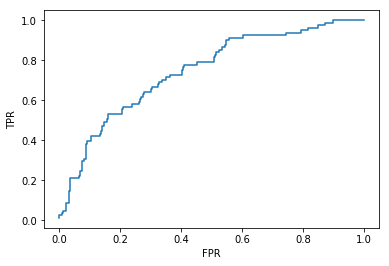

In [29]:
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [28]:
metrics.auc(fpr, tpr)

0.7454196967134562